#### Reading the csv file

In [1]:
import csv
with open('winequality.csv', 'r') as file:
    #print(file.readline())
    #print(file.readline())
    for num,row in enumerate(file):
        if num <5:
            #csv.reader(file)
            print(row)

type;fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality

White;7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6

White;6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6

White;8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6

White;7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6



In [2]:
from collections import namedtuple
header = """type fixed_acidity 
volatile_acidity citric_acid residual_sugar chlorides free_sulfur_dioxide 
total_sulfur_dioxide density pH sulphates alcohol quality"""
wineRecord = namedtuple('wineRecord', header)

import re
regex_pat = re.compile(r'^\d*(\.\d*)|(^\d*)', flags=re.IGNORECASE)

import csv
for wine in map(wineRecord._make, csv.reader(open("winequality.csv", "r"),delimiter=";")):
    for name in wineRecord._fields:
        if name not in ("type", "quality"):
            m=regex_pat.fullmatch(getattr(wine, name))
            if m == None:
                print (getattr(wine, name))

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
128.933.333.333.333
128.933.333.333.333
114.666.666.666.667
100.333.333.333.333
114.333.333.333.333
105.333.333.333.333
953.333.333.333.333
109.333.333.333.333
109.333.333.333.333
113.666.666.666.667
113.333.333.333.333
110.666.666.666.667
113.333.333.333.333
973.333.333.333.333
973.333.333.333.333
113.333.333.333.333
123.333.333.333.333
112.666.666.666.667
105.666.666.666.667
117.333.333.333.333
109.666.666.666.667
109.666.666.666.667
109.666.666.666.667
101.333.333.333.333
101.333.333.333.333
104.666.666.666.667
104.666.666.666.667
116.333.333.333.333
116.333.333.333.333
131.333.333.333.333
120.666.666.666.667
963.333.333.333.333
953.333.333.333.333
953.333.333.333.333
100.333.333.333.333
100.333.333.333.333
110.666.666.666.667
956.666.666.666.667
135.666.666.666.667
923.333.333.333.333


#### Exploring on Pandas

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# upload data
df = pd.read_csv('winequality.csv', sep =';',
                 #, dtype = dtype
                )

#When using dtype = np.float64 for 'alcohol' I get
#ValueError: could not convert string to float: '923.333.333.333.333'

In [5]:
for column in df.columns:
    if df[column].dtype != 'object':
        print("'%s' : np.%s ," % (column, df[column].dtype))
    else:
        print("'%s' : %s ," % (column, df[column].dtype))

'type' : object ,
'fixed acidity' : np.float64 ,
'volatile acidity' : np.float64 ,
'citric acid' : np.float64 ,
'residual sugar' : np.float64 ,
'chlorides' : np.float64 ,
'free sulfur dioxide' : np.float64 ,
'total sulfur dioxide' : np.float64 ,
'density' : np.float64 ,
'pH' : np.float64 ,
'sulphates' : np.float64 ,
'alcohol' : object ,
'quality' : np.int64 ,


In [6]:
# data cleaning 'alcohol'
import re
regex_pat = re.compile(r'^[1-9]\d*(\.\d\d\d)(\.\d\d\d)(\.\d\d\d)(\.\d\d\d)$', flags=re.IGNORECASE)
#pd.Series(['117.333.333.333.333', '32.0', np.nan]).str.replace(regex_pat, '')
df_alcohol = df['alcohol'].str.replace(regex_pat, '-')
df_alcohol = df_alcohol.replace('-', np.nan)
df_alcohol=df_alcohol.astype('float64')
print("Missings in 'alcohol' after cleaning : %d" % df_alcohol.isnull().sum())
df['alcohol'] = df_alcohol
del df_alcohol

Missings in 'alcohol' after cleaning : 40


In [7]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
# missing data and distribution for each categorical column
#for column in ['type', 'quality']:    
#    print("###################: %s" % column)
#    print("# of missings: %d"% df[column].isnull().sum())
#    print("\nvalue_counts():")
#    print(df[column].value_counts())
#    print()

In [9]:
print("# of missings: \n{0}".format(df.isnull().sum()))

# of missings: 
type                     0
fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                 40
quality                  0
dtype: int64


In [10]:
# missing data and distribution for each numerical column
#for column in df.columns:    
#    print("###################: %s" % column)
#    print("\ndescribe():")
#    print(df[column].describe())
#    print()

In [11]:
# almost every column has outliers
# missing data only in alcohol, for now

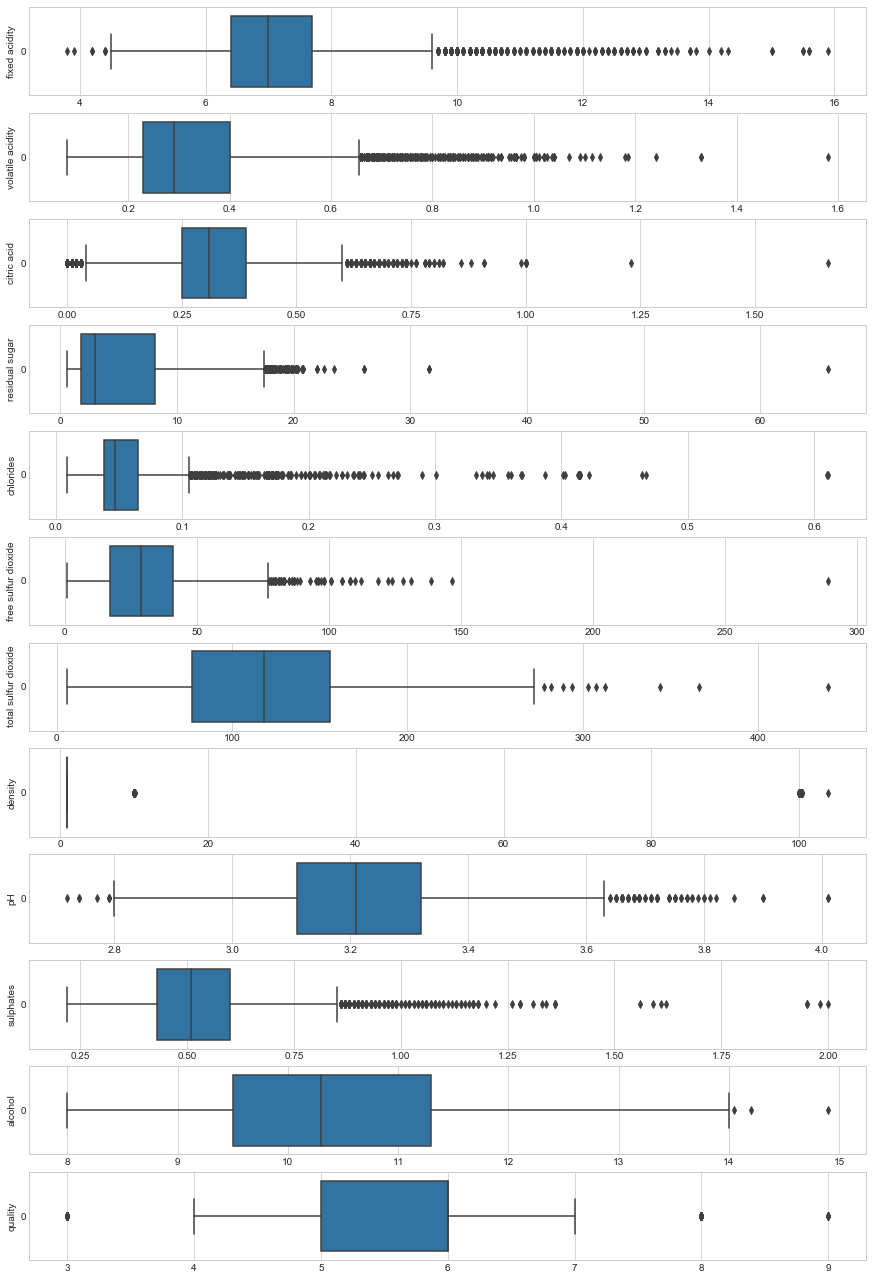

In [12]:
# let's see distributions
import seaborn as sns
sns.set_style("whitegrid")

plotable_columns = [t for t in df.columns if df[t].dtype != 'object']
n_plots = len(df.columns)

fig, ax = plt.subplots(figsize=(15, 25))
for column in enumerate(plotable_columns):
    plt.subplot(n_plots,1,1+column[0])
    plt.ylabel(column[1])
    sns.boxplot(data=df[column[1]],orient="h")
plt.show()

In [13]:
# Density distribution is odd. It seams inconsistent data >>1.
df['density'].describe()

count    6497.000000
mean        1.710882
std         7.636088
min         0.987110
25%         0.992340
50%         0.994890
75%         0.996990
max       103.898000
Name: density, dtype: float64

In [12]:
# validade density x alcohol
# df[df.density <100]
import seaborn as sns
sns.set(style="ticks", color_codes=True)

df1 = df[df.density>=100]
df2 = df[(df.density<100)&(df.density >=10)]
df3 = df[df.density <10]
df4 = df3[df3.density>1]

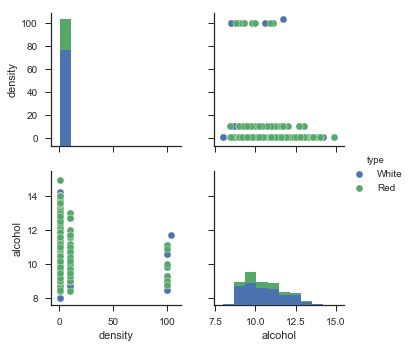

In [13]:
#yes we have data inconsistency
g = sns.pairplot(df[['density', 'alcohol', 'type']].dropna(), hue="type")

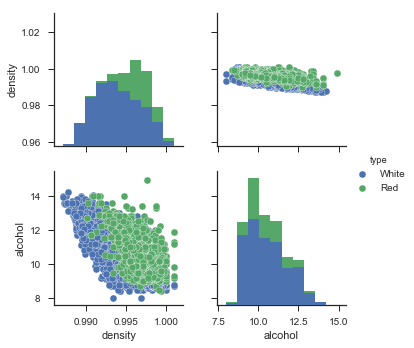

In [14]:
#this is what good data looks like, with 0.01 on total variation.
g = sns.pairplot(df3[['density', 'alcohol', 'type']].dropna(), hue="type")

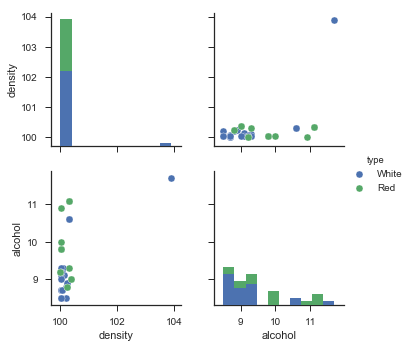

In [15]:
# Greater then 100. Little correlation with healthy data and .04 variation would be to hight
#df1=df1[df1.density<102]
g = sns.pairplot(df1[['density', 'alcohol', 'type']].dropna(), hue="type")

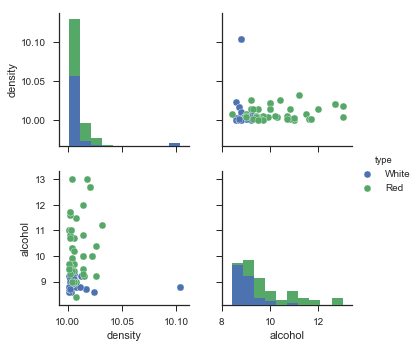

In [16]:
# .05 variation is to high
#df2=df2[df2.density<10.05]
g = sns.pairplot(df2[['density', 'alcohol', 'type']].dropna(), hue="type")

In [17]:
# let'us see other columns

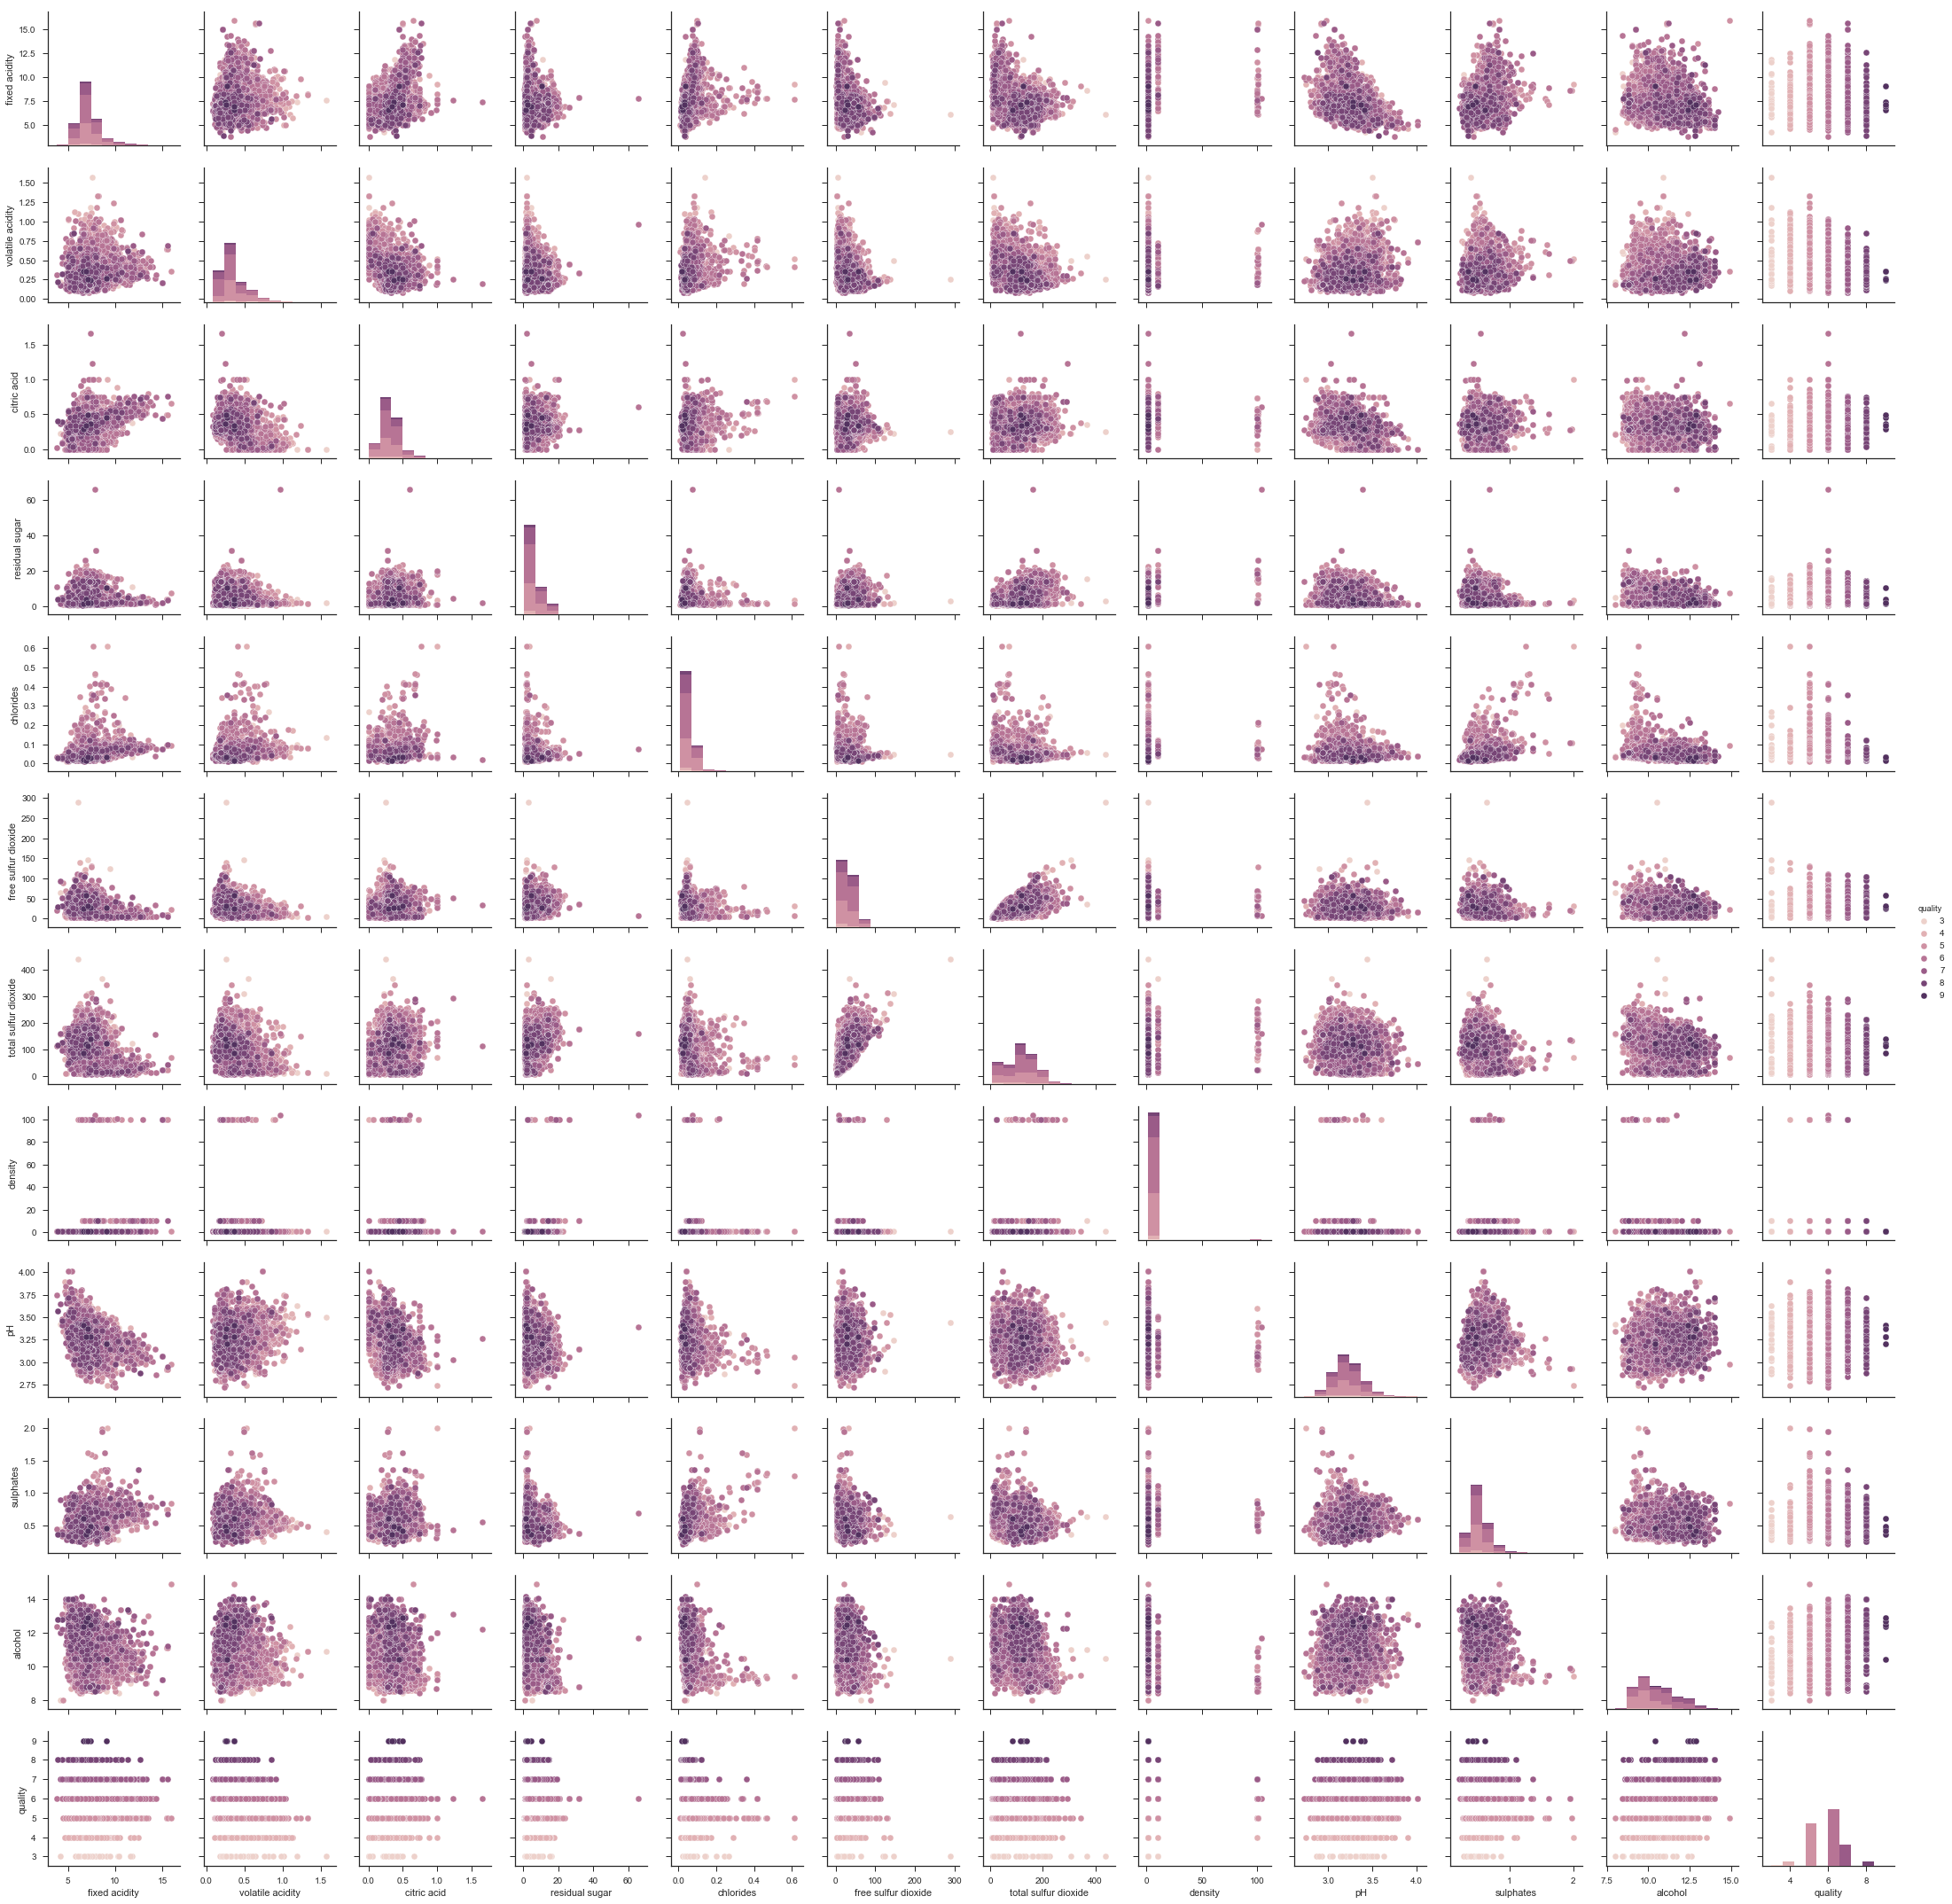

In [18]:
g = sns.pairplot(df.dropna(), hue="quality", palette =sns.cubehelix_palette(8))

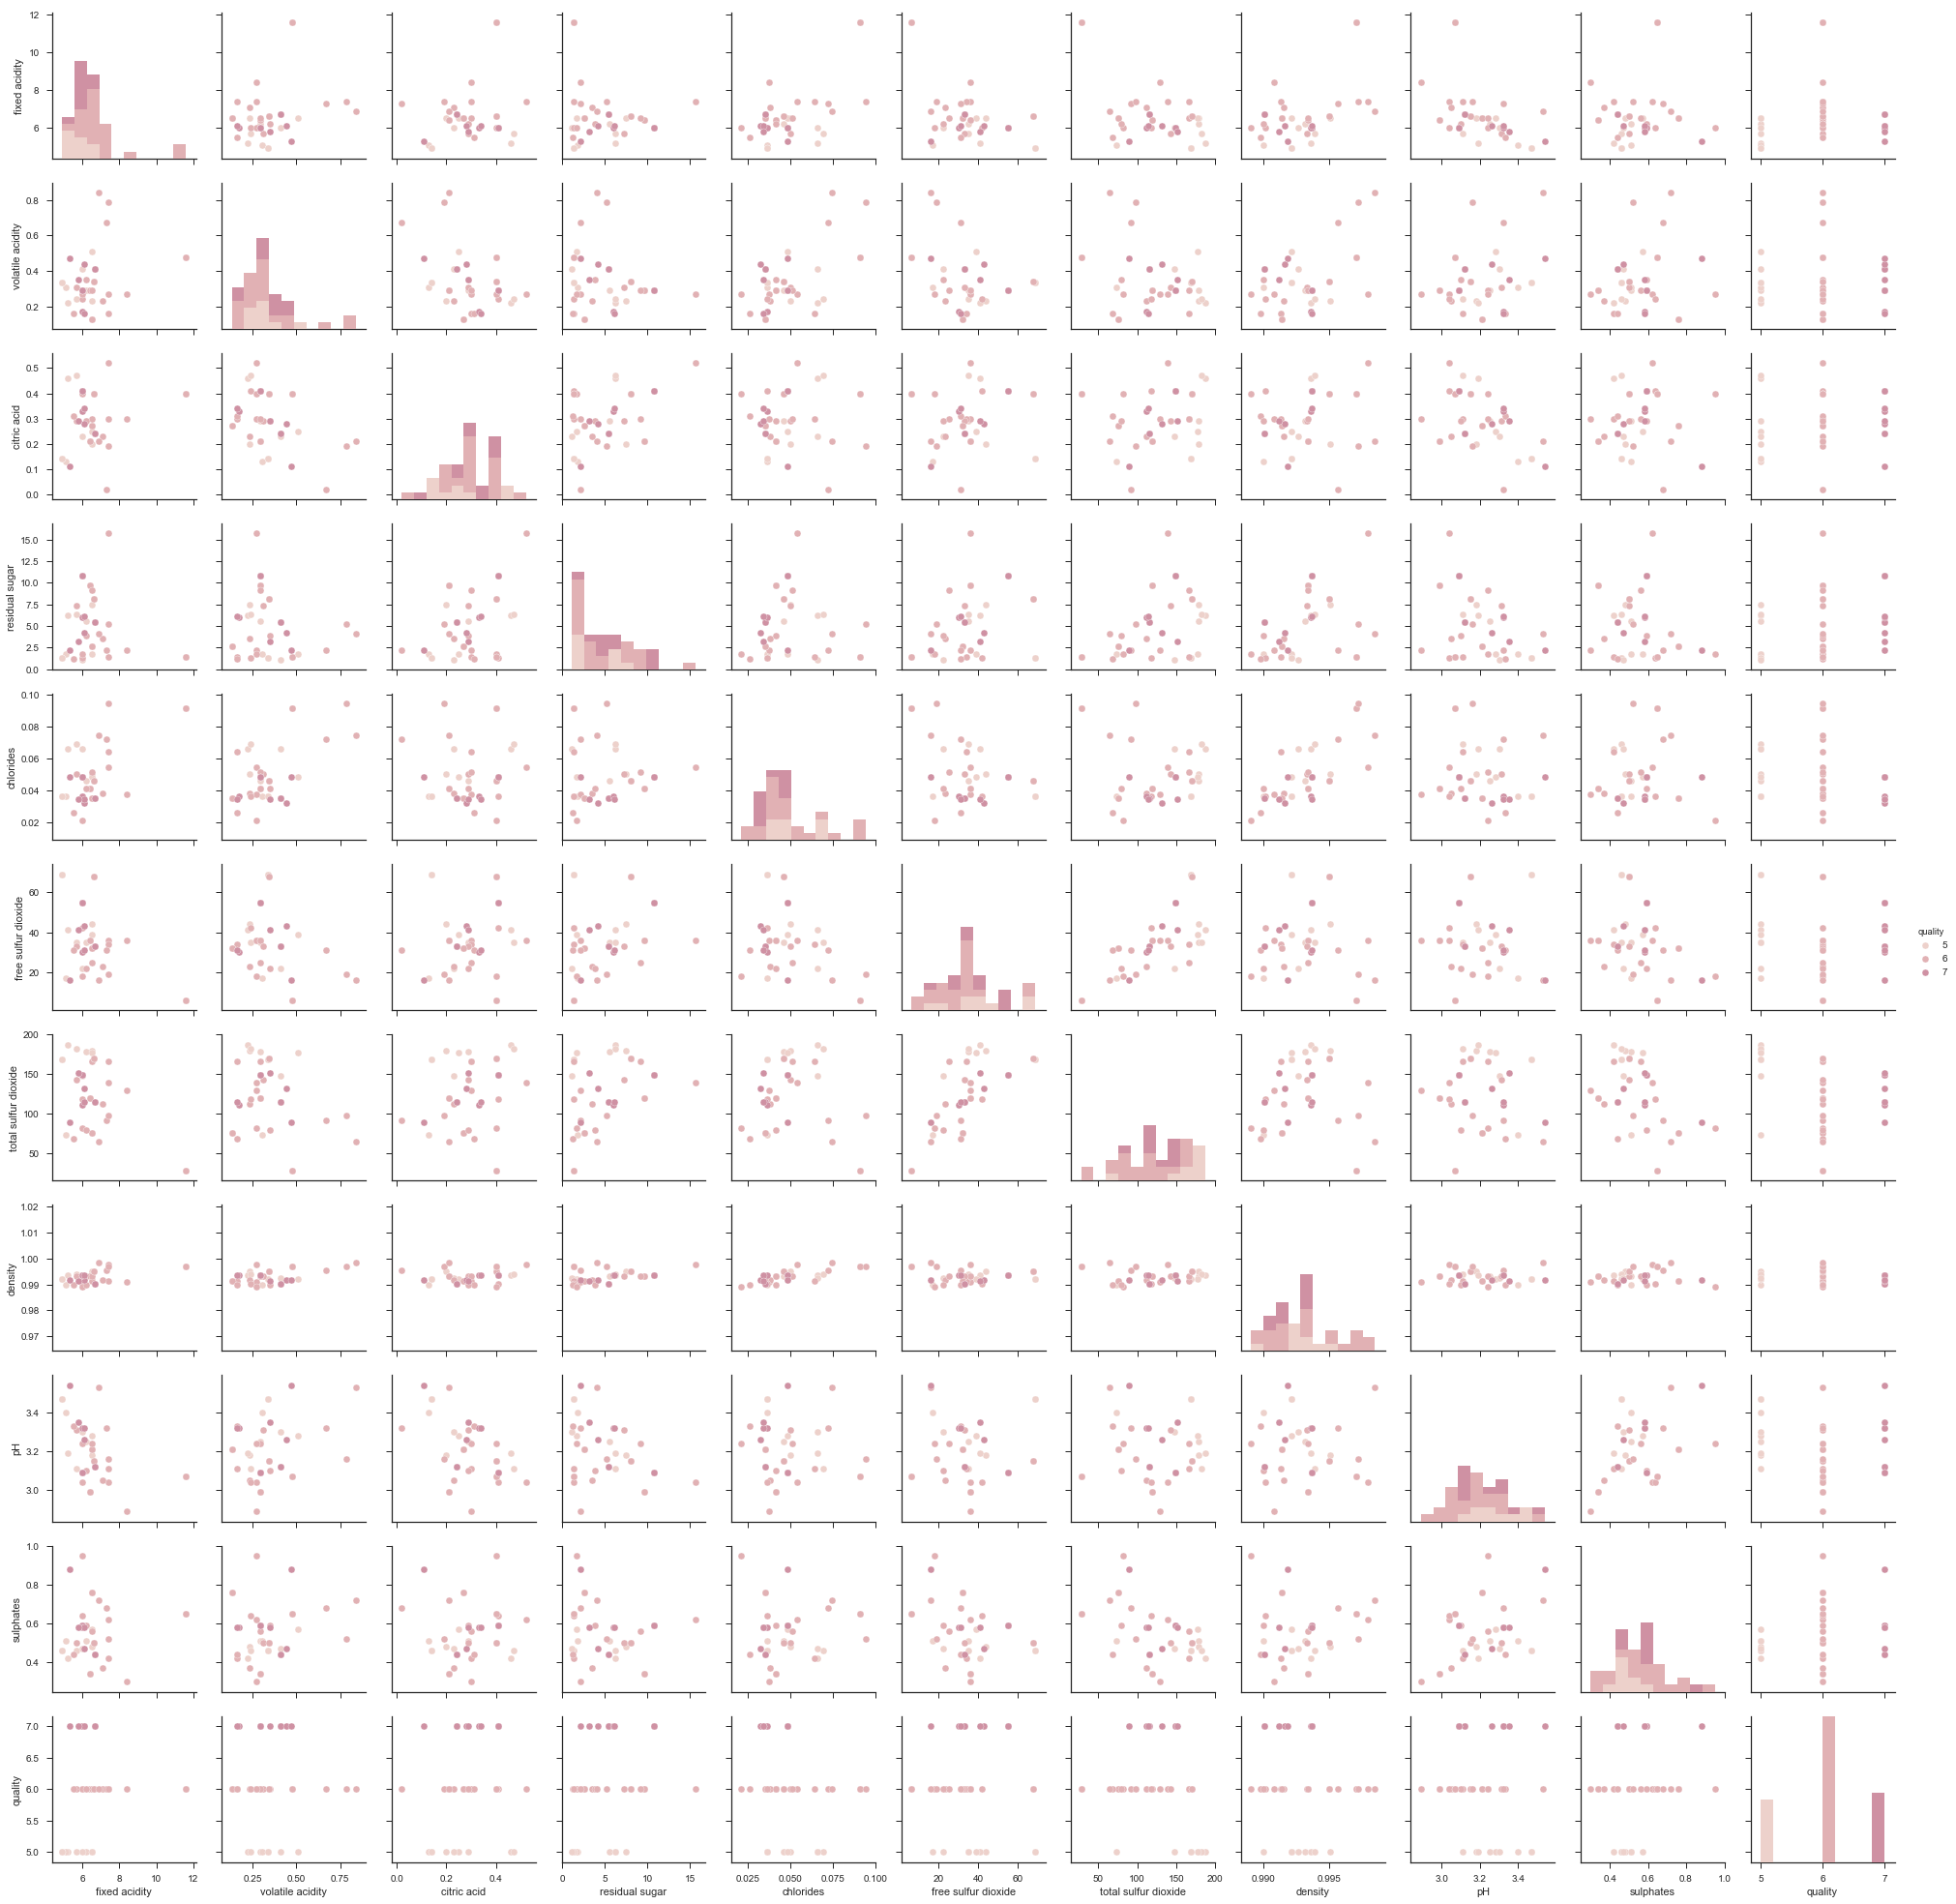

In [19]:
# missing data for alcohol, seems to be concentrated at 5,6,7, and having all fives
df_view = df[df.alcohol.isnull()][[t for t in df.columns if t!='alcohol']]
g = sns.pairplot(df_view, hue="quality", palette =sns.cubehelix_palette(8))

In [20]:
# missing inputation for the 40 missing in alcohol
# density generates 3 types of densities

# density generates 3 types of densities
df['density_levels'] = 1*(df.density<=2) + 2*((df.density>2)&(df.density<=12))+ 3*(df.density>12)
df['density_1'] = 1*(df.density<=2)*df.density
df['density_2'] =1*((df.density>2)&(df.density<=12))*df.density
df['density_3'] =1*(df.density>12)*df.density
df['density_levels'].value_counts()

1    6361
2      98
3      38
Name: density_levels, dtype: int64

In [21]:
# criar um notebook data_prep
# using regression in order to input missing data in alcohol

#### Missing Inputation with Linear Regression

In [22]:
df['alcohol_missing'] = 1*df['alcohol'].isnull()
df['is_red'] = 1*(df.type == 'Red')

In [23]:
df.columns = [t.replace(" ", "_") for t in df.columns]

In [24]:
df.corr()['alcohol']

fixed_acidity          -0.093692
volatile_acidity       -0.036916
citric_acid            -0.009087
residual_sugar         -0.359799
chlorides              -0.255883
free_sulfur_dioxide    -0.180348
total_sulfur_dioxide   -0.266148
density                -0.080264
pH                      0.121955
sulphates              -0.004484
alcohol                 1.000000
quality                 0.444285
density_levels         -0.107774
density_1               0.096100
density_2              -0.086262
density_3              -0.068213
alcohol_missing              NaN
is_red                 -0.032002
Name: alcohol, dtype: float64

In [25]:
df_corr_red = df[(df.type == 'Red')&(df.density_levels==1)].corr()['alcohol']
df_corr_w = df[(df.type == 'White')&(df.density_levels==1)].corr()['alcohol']

In [26]:
red_corr = df_corr_red[df_corr_red.abs()>0.2].index.values.tolist()
w_corr = df_corr_w[df_corr_w.abs()>0.2].index.values.tolist()
for f in ['quality','alcohol', 'density_1', 'density_2', 'density_3']:
    try:
        red_corr.remove(f)
        w_corr.remove(f)
    except: pass

In [27]:
print(red_corr)

['volatile_acidity', 'chlorides', 'total_sulfur_dioxide', 'density', 'pH']


In [28]:
print(w_corr)

['residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density']


In [29]:
w_corr.extend(red_corr)
w_corr.append('is_red')
w_corr=list(set(w_corr))
print(w_corr)

['total_sulfur_dioxide', 'volatile_acidity', 'free_sulfur_dioxide', 'residual_sugar', 'chlorides', 'pH', 'is_red', 'density']


In [30]:
df[df.alcohol.isnull()].type.value_counts()

White    34
Red       6
Name: type, dtype: int64

In [31]:
df_complete = df[(df.alcohol_missing==0)&(df.density_levels==1)]
df_miss = df[df.alcohol_missing==1]

In [32]:
df_complete.density_levels.value_counts()
df_miss.density_levels.value_counts()

1    40
Name: density_levels, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_complete[w_corr],df_complete['alcohol'],
    test_size =0.33, random_state=42)

# simple regression model
#from sklearn import linear_model
#reg = linear_model.LinearRegression()
#reg.fit(X_train,y_train)

In [34]:
from sklearn import tree
reg=tree.DecisionTreeRegressor(max_depth=9)
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [35]:
#reg.coef_
y_pred = reg.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.37
Variance score: 0.74


In [37]:
y_pred = reg.predict(df_miss[w_corr])

In [38]:
len(y_pred)

40

In [39]:
#df[df.alcohol_missing!=1]

In [40]:
df_miss=df_miss.copy()
df_miss['alcohol']=y_pred

In [41]:
df=pd.concat([df_miss,df[df['alcohol_missing']==0]])

In [42]:
df.sort_index(inplace=True)
df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,density_levels,density_1,density_2,density_3,alcohol_missing,is_red
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,1.0010,0.0,0.0,0,0
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,0.9940,0.0,0.0,0,0
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,0.9951,0.0,0.0,0,0
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0.9956,0.0,0.0,0,0
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0.9956,0.0,0.0,0,0


In [45]:
# working on density correction
df['density_2']=df['density_2']/10
df['density_3']=df['density_3']/100

df['density_t'] = df['density_1']+df['density_2']+df['density_3']

In [47]:
# using robust scaler on scalar fields
scalable_fields = [ 'density_t','fixed_acidity', 'volatile_acidity',
                'citric_acid','residual_sugar', 'chlorides',
                'free_sulfur_dioxide','total_sulfur_dioxide',
                'pH', 'sulphates', 'alcohol']

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df[scalable_fields])

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [48]:
X =scaler.transform(df[scalable_fields])

In [49]:
df_scaled = pd.DataFrame(X, columns = scalable_fields)

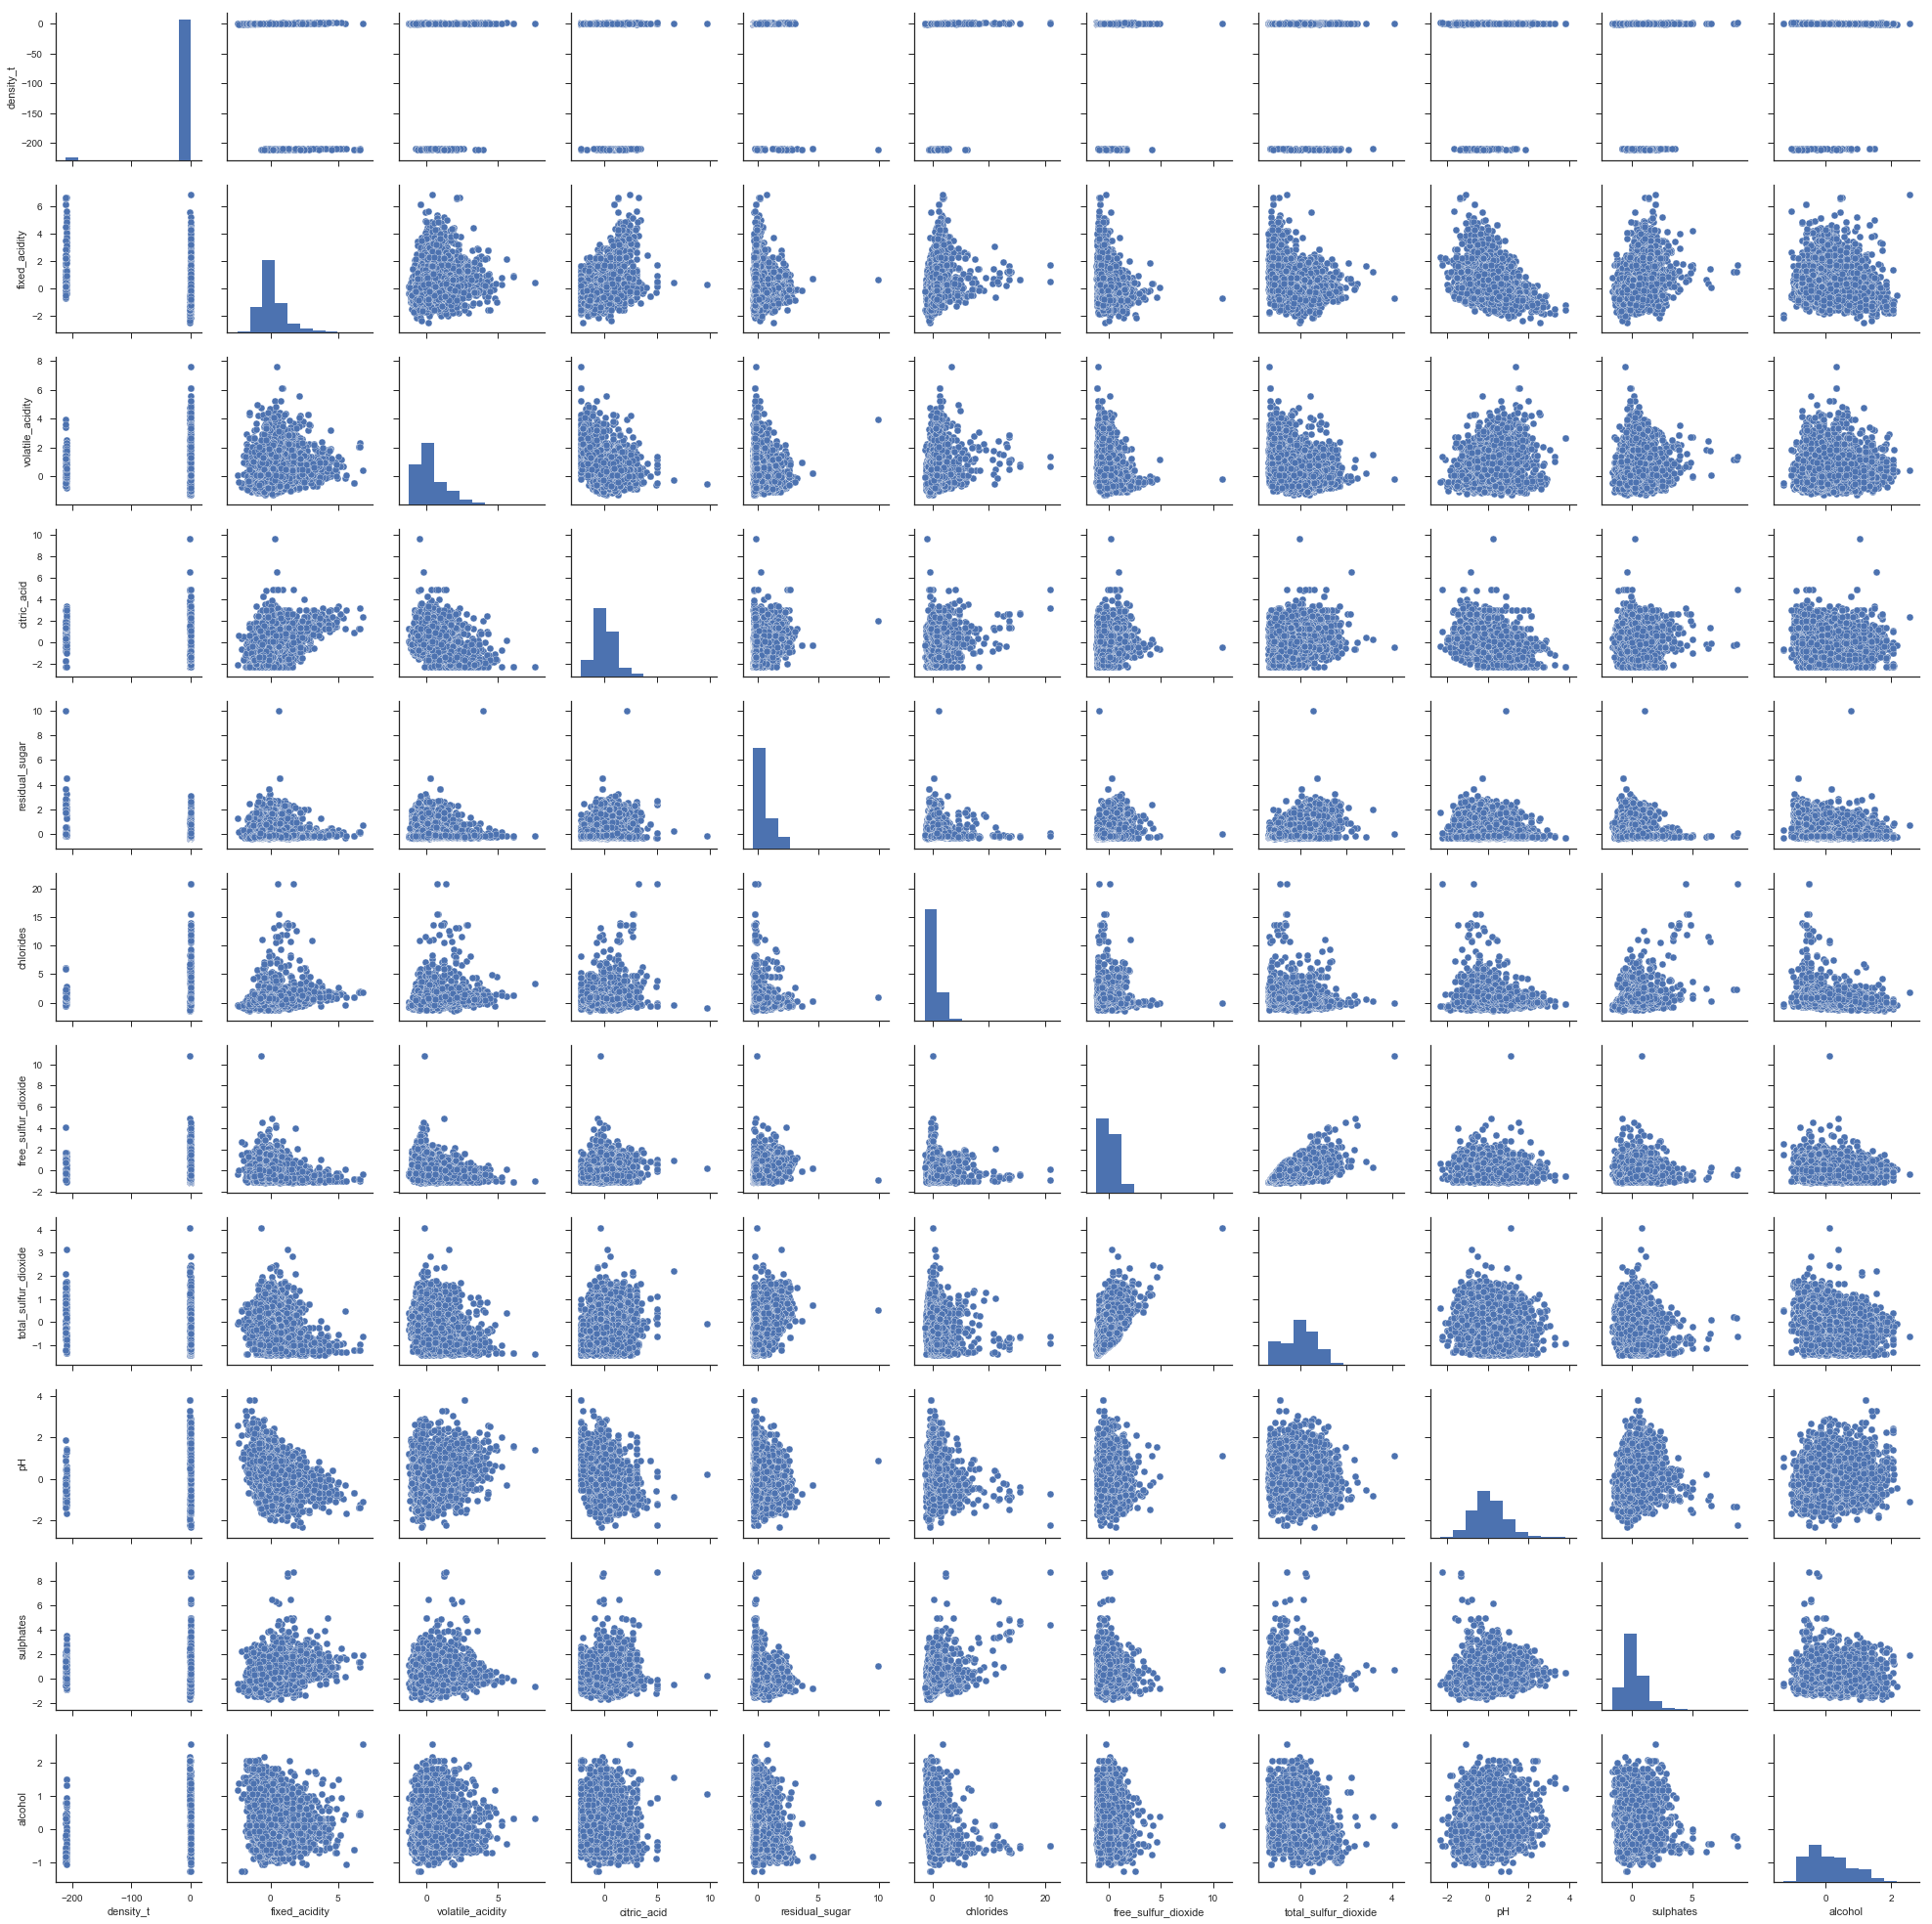

In [50]:
g = sns.pairplot(df_scaled, palette =sns.cubehelix_palette(8))

In [51]:
df_preprocessed = pd.concat([df[[t for t in df.columns if t not in scalable_fields]].copy(),df_scaled], axis=1)

In [52]:
# Join scaled and non scaled data
# save everything to pickles

In [53]:
df_preprocessed.head()

,type,density,quality,density_levels,density_1,density_2,density_3,alcohol_missing,is_red,density_t,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
0,White,1.0010,6,1,1.0010,0.0,0.0,0,0,1.340426,0.000000,-0.117647,0.357143,2.809524,-0.074074,0.666667,0.658228,-1.000000,-0.352941,-0.833333
1,White,0.9940,6,1,0.9940,0.0,0.0,0,0,-0.148936,-0.538462,0.058824,0.214286,-0.222222,0.074074,-0.625000,0.177215,0.428571,-0.117647,-0.444444
2,White,0.9951,6,1,0.9951,0.0,0.0,0,0,0.085106,0.846154,-0.058824,0.642857,0.619048,0.111111,0.041667,-0.265823,0.238095,-0.411765,-0.111111
3,White,0.9956,6,1,0.9956,0.0,0.0,0,0,0.191489,0.153846,-0.352941,0.071429,0.873016,0.407407,0.750000,0.860759,-0.095238,-0.647059,-0.222222
4,White,0.9956,6,1,0.9956,0.0,0.0,0,0,0.191489,0.153846,-0.352941,0.071429,0.873016,0.407407,0.750000,0.860759,-0.095238,-0.647059,-0.222222


In [54]:
# checking distributions
df_preprocessed.pivot_table(columns = ['density_levels'], values = 'density')

density_levels,1,2,3
density,0.994557,10.008786,100.220079


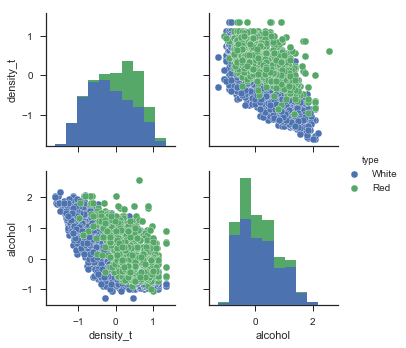

In [60]:
# checking distribution ofr corrected density
df1=df_preprocessed[df_preprocessed.density_1>0]
g = sns.pairplot(df1[['density_t', 'alcohol', 'type']].dropna(), hue="type")

In [57]:
df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,density_levels,density_1,density_2,density_3,alcohol_missing,is_red,density_t
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,1.0010,0.0,0.0,0,0,1.0010
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,0.9940,0.0,0.0,0,0,0.9940
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,0.9951,0.0,0.0,0,0,0.9951
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0.9956,0.0,0.0,0,0,0.9956
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0.9956,0.0,0.0,0,0,0.9956


In [58]:
df_preprocessed.head()

,type,density,quality,density_levels,density_1,density_2,density_3,alcohol_missing,is_red,density_t,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
0,White,1.0010,6,1,1.0010,0.0,0.0,0,0,1.340426,0.000000,-0.117647,0.357143,2.809524,-0.074074,0.666667,0.658228,-1.000000,-0.352941,-0.833333
1,White,0.9940,6,1,0.9940,0.0,0.0,0,0,-0.148936,-0.538462,0.058824,0.214286,-0.222222,0.074074,-0.625000,0.177215,0.428571,-0.117647,-0.444444
2,White,0.9951,6,1,0.9951,0.0,0.0,0,0,0.085106,0.846154,-0.058824,0.642857,0.619048,0.111111,0.041667,-0.265823,0.238095,-0.411765,-0.111111
3,White,0.9956,6,1,0.9956,0.0,0.0,0,0,0.191489,0.153846,-0.352941,0.071429,0.873016,0.407407,0.750000,0.860759,-0.095238,-0.647059,-0.222222
4,White,0.9956,6,1,0.9956,0.0,0.0,0,0,0.191489,0.153846,-0.352941,0.071429,0.873016,0.407407,0.750000,0.860759,-0.095238,-0.647059,-0.222222


In [59]:
df_preprocessed.to_pickle('df_preprocessed.pkl')